<a href="https://colab.research.google.com/github/vaibhavskeerthi123/ML_LAB/blob/main/Lab%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [6]:
import pandas as pd

# Correct URL assignment
url = "https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv"

# Read CSV from URL
df = pd.read_csv(url)

# Display descriptive statistics
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


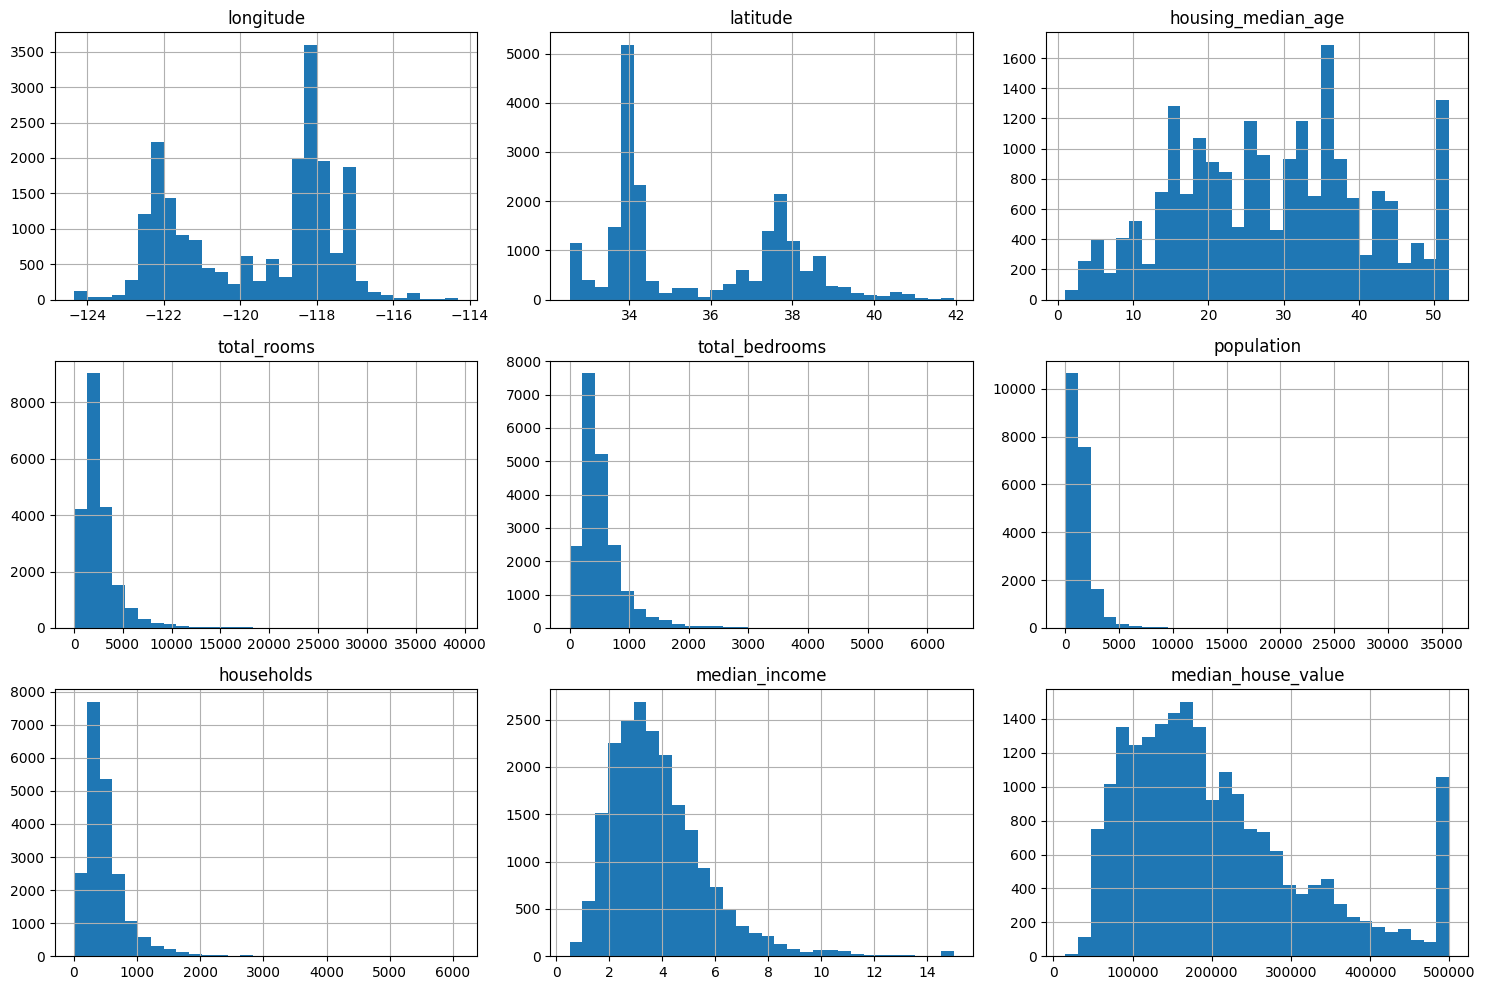

In [8]:

import matplotlib.pyplot as plt

# Plot histograms for all numerical features
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [9]:

from sklearn.model_selection import train_test_split

# Random split (80% train, 20% test)
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print("Train set size:", len(train_set))
print("Test set size:", len(test_set))


Train set size: 16512
Test set size: 4128


In [10]:
import numpy as np

# Create income category column
df["income_cat"] = pd.cut(df["median_income"],
                          bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                          labels=[1, 2, 3, 4, 5])


In [11]:

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

print("Stratified Train size:", len(strat_train_set))
print("Stratified Test size:", len(strat_test_set))

Stratified Train size: 16512
Stratified Test size: 4128


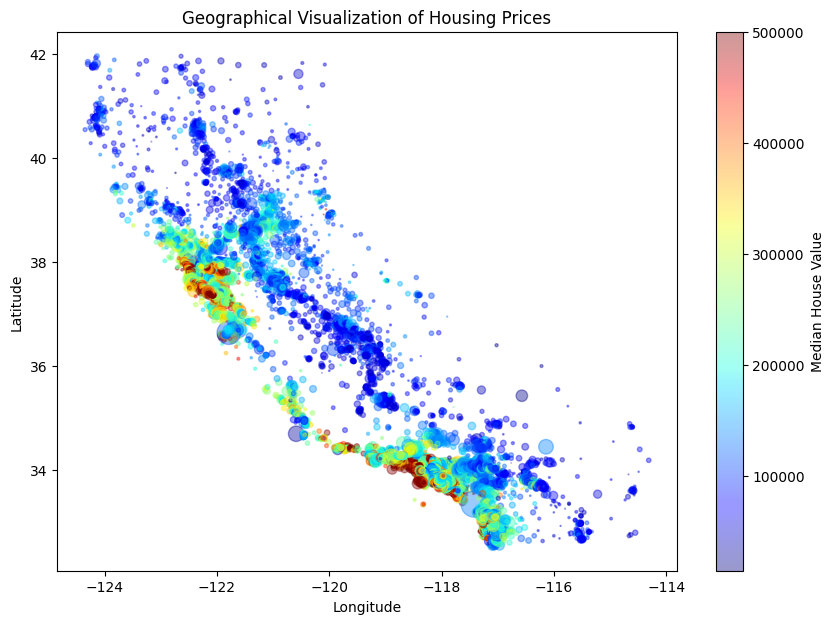

In [12]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

scatter = plt.scatter(
    df["longitude"],
    df["latitude"],
    c=df["median_house_value"],
    cmap="jet",
    alpha=0.4,
    s=df["population"]/100,
)

plt.colorbar(scatter, label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Visualization of Housing Prices")
plt.show()


In [13]:
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Correlation with housing price
corr_with_price = corr_matrix["median_house_value"].sort_values(ascending=False)

print(corr_with_price)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


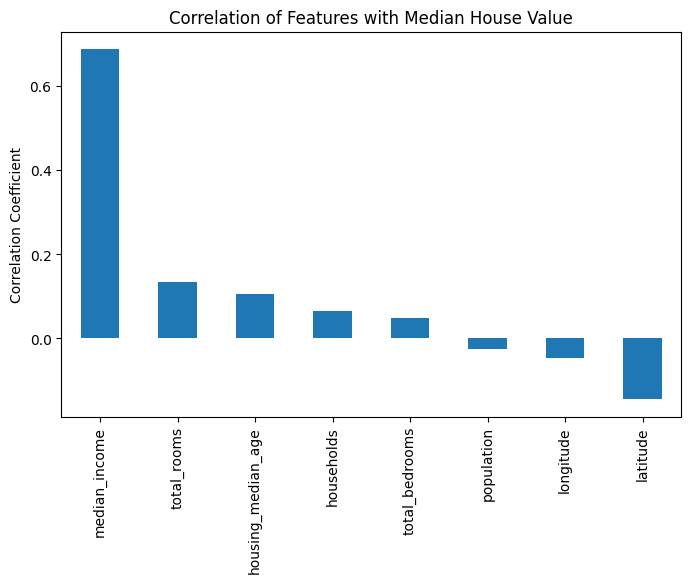

In [14]:

corr_with_price.drop("median_house_value").plot(kind="bar", figsize=(8,5))
plt.title("Correlation of Features with Median House Value")
plt.ylabel("Correlation Coefficient")
plt.show()


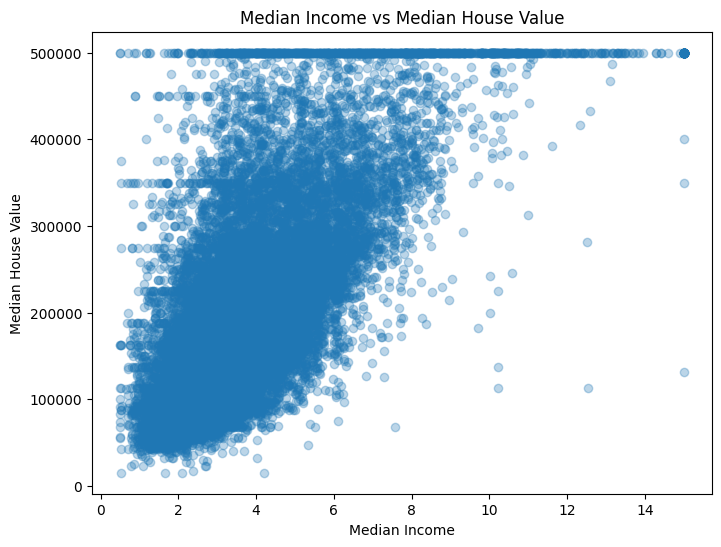

In [15]:
plt.figure(figsize=(8,6))

plt.scatter(df["median_income"], df["median_house_value"], alpha=0.3)

plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs Median House Value")
plt.show()

In [16]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

In [17]:
corr_matrix = df.corr(numeric_only=True)

corr_with_price = corr_matrix["median_house_value"].sort_values(ascending=False)

print(corr_with_price)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


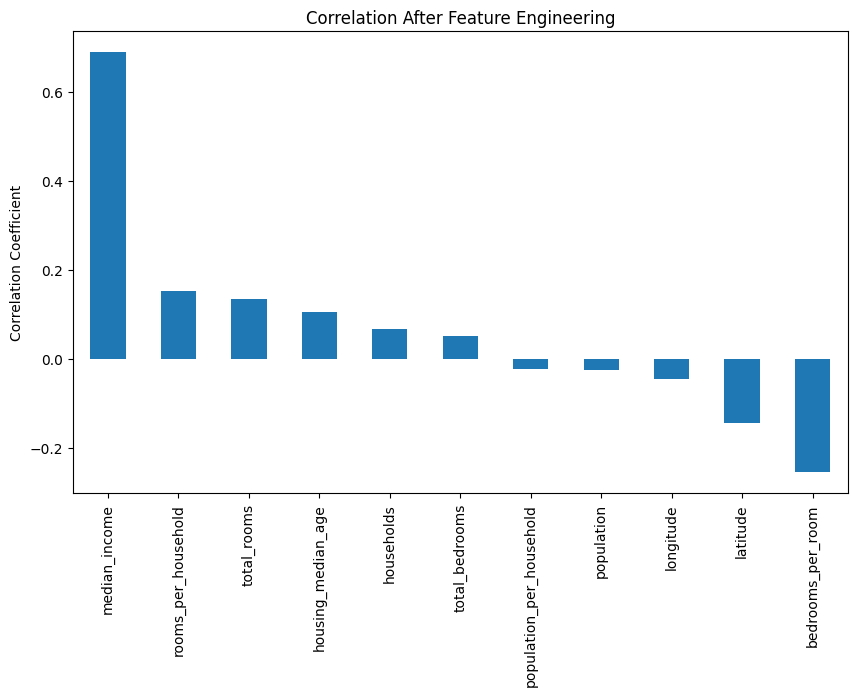

In [18]:

corr_with_price.drop("median_house_value").plot(kind="bar", figsize=(10,6))
plt.title("Correlation After Feature Engineering")
plt.ylabel("Correlation Coefficient")
plt.show()

In [19]:

import pandas as pd
from sklearn.impute import SimpleImputer

# 1. Check missing values
print(df.isnull().sum())

# 2. Fill missing values in total_bedrooms with median
imputer = SimpleImputer(strategy="median")
df["total_bedrooms"] = imputer.fit_transform(df[["total_bedrooms"]])

# 3. Encode categorical feature ocean_proximity using one-hot encoding
df = pd.get_dummies(df, columns=["ocean_proximity"])

# 4. Optional: Remove capped/ extreme values in median_house_value
df = df[df["median_house_value"] < 500000]

# 5. Optional: Check final cleaned dataset
print(df.info())

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
income_cat                    0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 19648 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   longitude                   19648 non-null  float64 
 1   latitude                    19648 non-null  float64 
 2   housing_median_age          19648 non-null  float64 
 3   total_rooms                 19648 non-null  float64 
 4   total_bedrooms              19648 non-null  float64 
 5   population              

In [20]:

import pandas as pd

# 1. Strip column names to avoid KeyError
df.columns = df.columns.str.strip()

# 2. Check if 'ocean_proximity' exists
if "ocean_proximity" in df.columns:
    print("Unique categories in 'ocean_proximity':")
    print(df["ocean_proximity"].value_counts())

    # 3. Apply One-Hot Encoding
    df = pd.get_dummies(df, columns=["ocean_proximity"])

    # 4. Show first 5 rows to verify
    print("\nData after One-Hot Encoding:")
    print(df.head())
else:
    print("Column 'ocean_proximity' does not exist.")

Column 'ocean_proximity' does not exist.
